In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse
import numpy as np
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [6]:
df = pd.read_csv('solarpowergeneration.csv')
df.shape
df.dropna(inplace=True)

In [7]:
df.columns

Index(['month', 'day', 'first-hour-period', 'distance-to-solar-noon',
       'temperature', 'wind-direction', 'wind-speed', 'sky-cover',
       'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [8]:
X=df.iloc[:,:12]
Y=df.iloc[:,12:]
print(X.shape,Y.shape)

(2919, 12) (2919, 1)


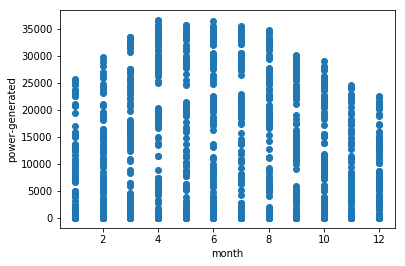

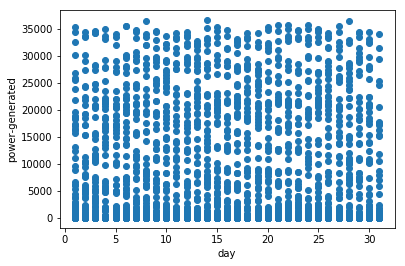

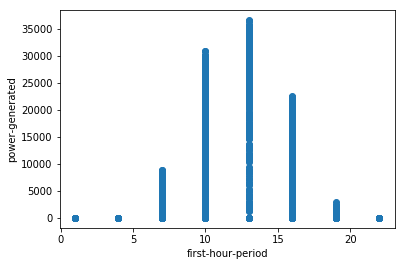

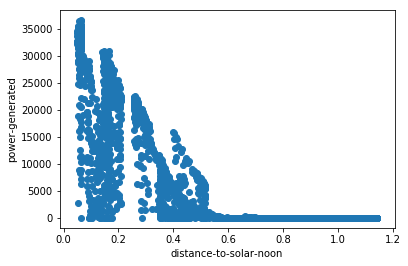

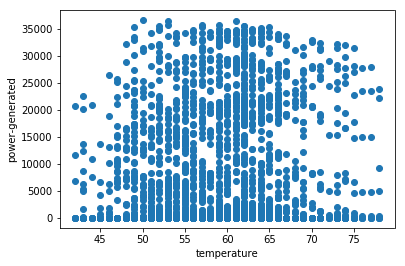

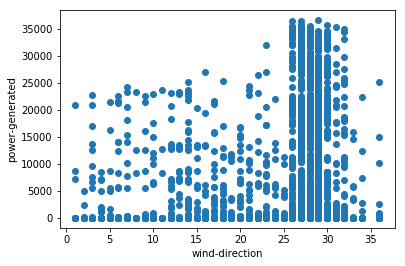

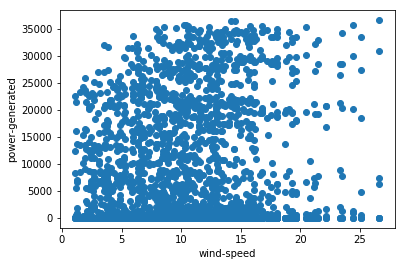

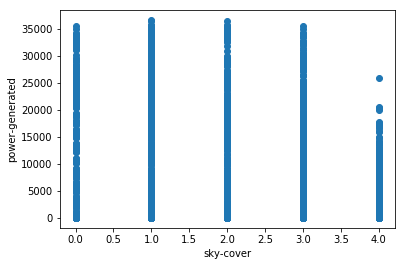

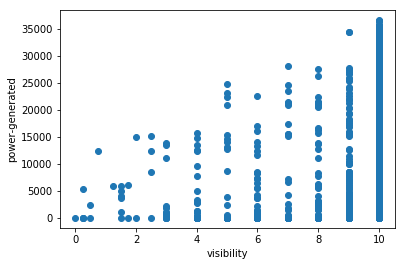

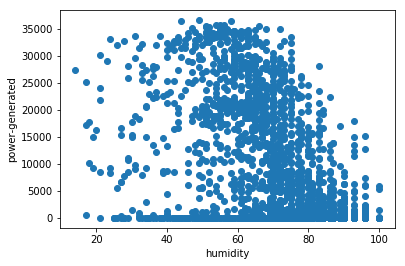

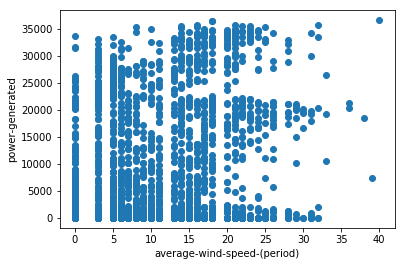

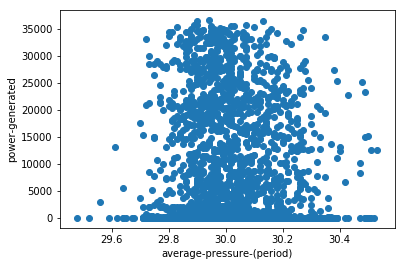

In [5]:
for i in range(12):
    plt.scatter(X[[i]],Y)
    plt.xlabel(X.columns[i])
    plt.ylabel(Y.columns[0])
    plt.show()

In [9]:
pow0=Y[Y['power-generated']==0].index

In [10]:
X.drop(pow0,axis=0,inplace=True)
Y.drop(pow0,axis=0,inplace=True)
X.reset_index(drop=True)
Y.reset_index(drop=True)
print(X.shape,Y.shape)

(1599, 12) (1599, 1)


In [11]:
X.describe()

,month,day,first-hour-period,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000
mean,6.449656,15.615385,12.649156,0.282395,58.969981,25.441526,10.458724,1.988743,9.496404,68.72858,11.576610,30.012339
std,3.236380,8.753060,3.974746,0.160509,6.733928,6.364712,4.798921,1.307004,1.462943,14.98907,7.838577,0.137290
min,1.000000,1.000000,7.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.250000,14.00000,0.000000,29.560000
25%,4.000000,8.000000,10.000000,0.146727,54.000000,26.000000,6.900000,1.000000,10.000000,61.00000,5.000000,29.920000
50%,6.000000,16.000000,13.000000,0.273046,59.000000,28.000000,10.300000,2.000000,10.000000,70.00000,11.000000,29.990000
75%,9.000000,23.000000,16.000000,0.420570,63.000000,29.000000,13.350000,3.000000,10.000000,80.00000,17.000000,30.100000
max,12.000000,31.000000,19.000000,0.738288,78.000000,36.000000,26.600000,4.000000,10.000000,100.00000,40.000000,30.530000


In [12]:
std=X.std()
mean=X.mean()
X=(X-mean)/mean

In [13]:
X.describe().round(decimals=2)

,month,day,first-hour-period,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
std,0.50,0.56,0.31,0.57,0.11,0.25,0.46,0.66,0.15,0.22,0.68,0.00
min,-0.84,-0.94,-0.45,-0.82,-0.29,-0.96,-0.89,-1.00,-0.97,-0.80,-1.00,-0.02
25%,-0.38,-0.49,-0.21,-0.48,-0.08,0.02,-0.34,-0.50,0.05,-0.11,-0.57,-0.00
50%,-0.07,0.02,0.03,-0.03,0.00,0.10,-0.02,0.01,0.05,0.02,-0.05,-0.00
75%,0.40,0.47,0.26,0.49,0.07,0.14,0.28,0.51,0.05,0.16,0.47,0.00
max,0.86,0.99,0.50,1.61,0.32,0.42,1.54,1.01,0.05,0.45,2.46,0.02


In [14]:
Y=np.array(Y).reshape(-1)

In [15]:
from sklearn.metrics import mean_squared_error as mse
import math

In [23]:
print('\n')
trainer=[]
tester=[]
for i in range(10,101,5):
    X1=X
    X2=X**2
    X3=X**3
    X4=X**4
    X5=X**5
    frames=[X1,X2,X3,X4,X5]
    X_ex=pd.concat(frames,axis=1)
    train_X, test_X, train_Y, test_Y = train_test_split(X_ex, Y,test_size=0.15, random_state=41)
    model=MLPRegressor(hidden_layer_sizes=(i),max_iter=2000,learning_rate_init=0.1,activation='relu',solver='adam')
    print('Hidden Layer size: [',i,']')
    model.fit(train_X,train_Y)
    train_p=model.predict(train_X)
    rmse1=math.sqrt(mse(train_p,train_Y))
    test_p=model.predict(test_X)
    rmse2=math.sqrt(mse(test_p,test_Y))
    er1=(rmse1/(train_Y.mean()))
    er2=(rmse2/(test_Y.mean()))
    print('Train acc:','%.2f'%er1,'Test acc:','%.2f'%er2,'\n')
    tester.append(er2)
    trainer.append(er1)



Hidden Layer size: [ 10 ]
Train acc: 0.23 Test acc: 0.29 

Hidden Layer size: [ 15 ]
Train acc: 0.24 Test acc: 0.27 

Hidden Layer size: [ 20 ]
Train acc: 0.20 Test acc: 0.26 

Hidden Layer size: [ 25 ]
Train acc: 0.20 Test acc: 0.26 

Hidden Layer size: [ 30 ]
Train acc: 0.20 Test acc: 0.27 

Hidden Layer size: [ 35 ]
Train acc: 0.20 Test acc: 0.27 

Hidden Layer size: [ 40 ]
Train acc: 0.21 Test acc: 0.27 

Hidden Layer size: [ 45 ]
Train acc: 0.19 Test acc: 0.25 

Hidden Layer size: [ 50 ]
Train acc: 0.21 Test acc: 0.27 

Hidden Layer size: [ 55 ]
Train acc: 0.19 Test acc: 0.26 

Hidden Layer size: [ 60 ]
Train acc: 0.20 Test acc: 0.27 

Hidden Layer size: [ 65 ]
Train acc: 0.20 Test acc: 0.28 

Hidden Layer size: [ 70 ]
Train acc: 0.19 Test acc: 0.28 

Hidden Layer size: [ 75 ]
Train acc: 0.23 Test acc: 0.27 

Hidden Layer size: [ 80 ]
Train acc: 0.19 Test acc: 0.27 

Hidden Layer size: [ 85 ]
Train acc: 0.22 Test acc: 0.27 

Hidden Layer size: [ 90 ]
Train acc: 0.19 Test acc: 0.

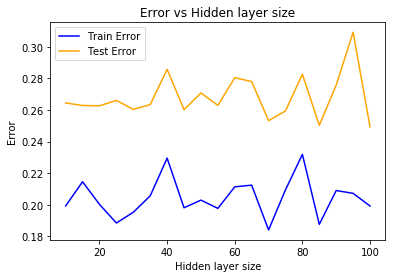

In [20]:
plt.plot(range(10,101,5),trainer,color='blue')
plt.plot(range(10,101,5),tester,color='orange')
plt.legend(['Train Error','Test Error'])
plt.xlabel('Hidden layer size')
plt.ylabel('Error')
plt.title('Error vs Hidden layer size')
plt.show()

In [13]:
X1=X
X2=X**2
X3=X**3
X4=X**4
X5=X**5
frames=[X1,X2,X3,X4,X5]
X_ex=pd.concat(frames,axis=1)
train_X, test_X, train_Y, test_Y = train_test_split(X_ex, Y,test_size=0.15, random_state=41)
model=MLPRegressor(hidden_layer_sizes=(15),max_iter=5000,learning_rate_init=0.1,activation='relu',solver='adam')
model.fit(train_X,train_Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=15, learning_rate='constant',
             learning_rate_init=0.1, max_fun=15000, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Text(0.5, 1.0, 'For Training set')

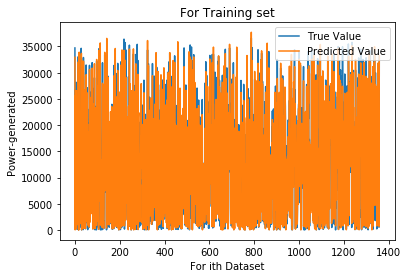

In [14]:
plt.plot(train_Y)
plt.plot(model.predict(train_X))
plt.legend(['True Value','Predicted Value'])
plt.xlabel('For ith Dataset')
plt.ylabel('Power-generated')
plt.title('For Training set')

Text(0.5, 1.0, 'For Test set')

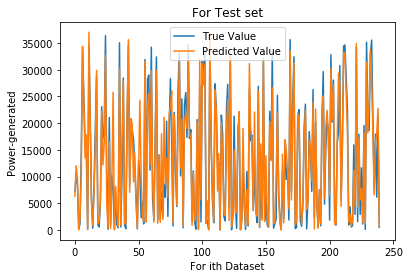

In [15]:
plt.plot(test_Y)
plt.plot(model.predict(test_X))
plt.legend(['True Value','Predicted Value'])
plt.xlabel('For ith Dataset')
plt.ylabel('Power-generated')
plt.title('For Test set')

Text(0.5, 1.0, 'For Test set')

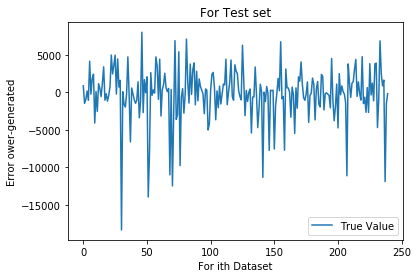

In [16]:
plt.plot(test_Y-model.predict(test_X))
plt.legend(['True Value','Predicted Value'])
plt.xlabel('For ith Dataset')
plt.ylabel('Error ower-generated')
plt.title('For Test set')